In [2]:
import os

### Raw Data File Path (get the list of all files path)

In [136]:
raw_data_folder = "./raw_data/"
labelled_folder = "./data/"
image_folder = './image_data/'

In [12]:
def get_visible_files_or_folder(path):
    folder_list = os.listdir(path)
    return [folder for folder in folder_list if not folder.startswith('.')]

In [23]:
def combine_paths(directory, file_list):
    if not directory.endswith(os.path.sep):
        directory += os.path.sep

    combined_paths = [os.path.join(directory, file) for file in file_list]

    return combined_paths

In [24]:
visible_folder = get_visible_files_or_folder(raw_data_folder)
all_files_path = []

for each_folder in visible_folder:
    file_list = get_visible_files_or_folder(os.path.join(raw_data_folder, each_folder))
    all_files_path.extend(combine_paths(os.path.join(raw_data_folder, each_folder), file_list))

In [26]:
len(all_files_path)

304

In [28]:
all_files_path[0]

'./raw_data/0004/00049397.pdf'

### Data Generator

#### Convert pdf to image

In [35]:
from pdf2image import convert_from_path

In [37]:
for each_file in all_files_path:
    doc_img = convert_from_path(each_file, 100)
    img_name = each_file.split('/')[-1]
    filename_without_extension = img_name.split('.')[0]
    doc_img[0].save(f'./image_data/{filename_without_extension}.jpg', 'JPEG')

Used [Robot VGG tool](https://www.robots.ox.ac.uk/~vgg/software/via/via.html) to label each image 

### Move to labelled data

In [142]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv("./doc_classifier_data.csv")
df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,00049397.jpg,222906,"{""caption"":"""",""public_domain"":""no"",""image_url""...",0,0,{},{}
1,00068790.jpg,221900,"{""caption"":"""",""public_domain"":""no"",""image_url""...",0,0,{},{}
2,00092635.jpg,208901,"{""caption"":"""",""public_domain"":""no"",""image_url""...",0,0,{},{}
3,00092782.jpg,156646,"{""caption"":"""",""public_domain"":""no"",""image_url""...",0,0,{},{}
4,00092785.jpg,218969,"{""caption"":"""",""public_domain"":""no"",""image_url""...",0,0,{},{}


In [111]:
form_type = df["file_attributes"].apply(lambda x: json.loads(x)["form_type"])

In [112]:
df_new = pd.DataFrame({
    "filename": df["filename"],
    "form_type": form_type
})

In [113]:
df_new["form_type"] = df_new["form_type"].replace({ \
                                                    "form d": "Form_D", \
                                                   'form 13F': 'Form_13F', \
                                                   'other': 'Other', \
                                                  'form X-17A-5': 'Form_X-17A-5', \
                                                  'form 6-K': 'Form_6-K', \
                                                  'form TA-2': 'Form_TA-2',
                                                  '82-submission facing sheet': '82_Submission_Facing_Sheet',\
                                                  'form 11-K': 'Form_11-K', \
                                                  'form 19B-4': 'Form_19B-4'})

In [114]:
df_new.form_type.unique()

array(['Form_D', 'Form_13F', 'Other', 'Form_X-17A-5', 'Form_6-K',
       'Form_TA-2', '82_Submission_Facing_Sheet', 'Form_11-K',
       'Form_19B-4'], dtype=object)

In [115]:
df_new.to_csv("./document_label_data.csv", index = False)

### Create label folder and move images to that label folder

In [116]:
df_new = pd.read_csv("./document_label_data.csv")
df_new.head()

,filename,form_type
0,00049397.jpg,Form_D
1,00068790.jpg,Form_D
2,00092635.jpg,Form_D
3,00092782.jpg,Form_13F
4,00092785.jpg,Form_D


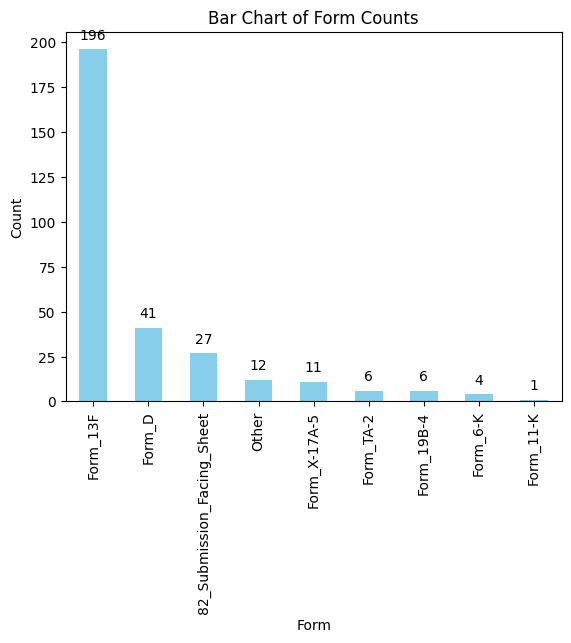

In [145]:
ax = df_new["form_type"].value_counts().plot(kind='bar', color='skyblue')


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Form')
plt.ylabel('Count')
plt.title('Bar Chart of Form Counts')

plt.show()

In [108]:
labelled_data_folder = "./labelled_data/"

In [117]:
unique_form_types = list(df_new["form_type"].unique())

In [118]:
for form in unique_form_types:
    directory_path = os.path.join(labelled_data_folder, form)
    if not os.path.exists(directory_path):
        os.mkdir(directory_path)

#### Move a file 

In [119]:
import shutil

In [137]:
for index, rows in df_new.iterrows():
    src_dir = os.path.join(image_folder, rows["filename"])
    dest_dir = os.path.join(labelled_data_folder, rows['form_type'])
    shutil.move(src_dir, dest_dir)